<a href="https://colab.research.google.com/github/carloslara99/Stock_analyzer_Iridium/blob/master/Stock_Analizer_for_IRDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Loading Finance from Yahoo Dataset and setting dependencies **

In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import math

import datetime
import pandas_datareader.data as web
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import preprocessing


start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 9, 9)

## **Loading Data**

In [0]:
df = web.DataReader("IRDM", 'yahoo', start, end)
print(df)


                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2015-01-02   9.940000   9.550000   9.840000   9.680000   499700   9.680000
2015-01-05   9.850000   9.440000   9.640000   9.480000   645100   9.480000
2015-01-06   9.580000   9.100000   9.510000   9.180000   510700   9.180000
2015-01-07   9.440000   9.130000   9.270000   9.260000   593200   9.260000
2015-01-08   9.650000   9.230000   9.410000   9.500000   801600   9.500000
2015-01-09   9.620000   9.390000   9.530000   9.430000   541400   9.430000
2015-01-12   9.570000   9.270000   9.470000   9.360000   443100   9.360000
2015-01-13   9.700000   9.200000   9.480000   9.320000   749900   9.320000
2015-01-14   9.320000   9.100000   9.180000   9.120000   559100   9.120000
2015-01-15   9.150000   8.240000   9.150000   8.630000  2655000   8.630000
2015-01-16   8.860000   8.580000   8.580000   8.840000   872600   8.840000
2015-01-20   9.270000   8

In [0]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [0]:
df = df[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [0]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.94,9.55,9.84,9.68,499700,9.68
2015-01-05,9.85,9.44,9.64,9.48,645100,9.48
2015-01-06,9.58,9.10,9.51,9.18,510700,9.18
2015-01-07,9.44,9.13,9.27,9.26,593200,9.26
2015-01-08,9.65,9.23,9.41,9.50,801600,9.50


In [0]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,24.219999,23.010000,24.030001,23.020000,768300,23.020000
2019-09-04,24.000000,23.200001,23.450001,23.990000,451900,23.990000
2019-09-05,25.020000,24.190001,24.360001,24.990000,601800,24.990000
2019-09-06,25.450001,24.620001,25.049999,24.930000,379600,24.930000
2019-09-09,25.209999,23.780001,24.940001,24.290001,845500,24.290001


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1179 entries, 2015-01-02 to 2019-09-09
Data columns (total 6 columns):
High         1179 non-null float64
Low          1179 non-null float64
Open         1179 non-null float64
Close        1179 non-null float64
Volume       1179 non-null int64
Adj Close    1179 non-null float64
dtypes: float64(5), int64(1)
memory usage: 64.5 KB


No missing values from data above

In [0]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1179.000000,1179.000000,1179.000000,1179.000000,1.179000e+03,1179.000000
mean,12.982366,12.502926,12.748397,12.751238,9.000644e+05,12.751238
std,5.931217,5.693893,5.817938,5.824622,6.169969e+05,5.824622
min,6.120000,5.850000,5.860000,5.900000,1.990000e+05,5.900000
25%,8.670000,8.380000,8.545000,8.530000,5.498500e+05,8.530000
50%,10.470000,10.150000,10.340000,10.320000,7.535000e+05,10.320000
75%,17.575000,16.875000,17.225000,17.299999,1.040250e+06,17.299999
max,28.240000,27.530001,27.969999,28.120001,8.453800e+06,28.120001


## **Exploring Rolling Mean and Return Rate of Stocks**


## **Rolling Mean Moving Average — to determine trend**

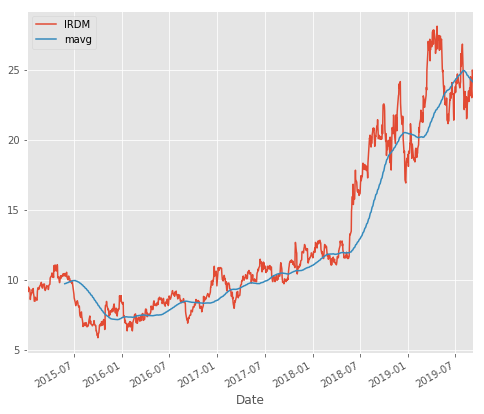

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='IRDM')
mavg.plot(label='mavg')
plt.legend()

## **Return Deviation — determine risk and return**

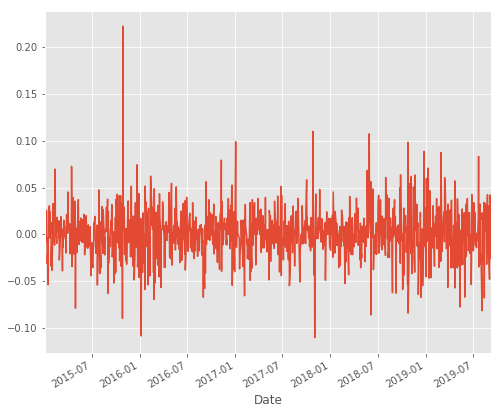

In [0]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

## **Analyze Competitors Stocks**

Text(0, 0.5, 'ORBC')

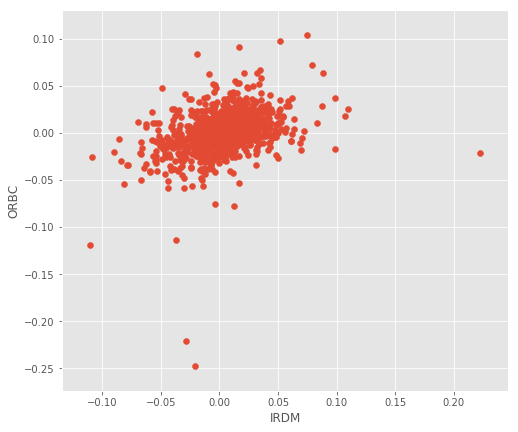

In [0]:
dfcomp = web.DataReader(['IRDM', 'ORBC', 'IMASY', 'GSAT', 'VSAT', 'I'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

plt.scatter(retscomp.IRDM, retscomp.ORBC)
plt.xlabel('IRDM')
plt.ylabel('ORBC')

## **Correlations Amongst different stocks**

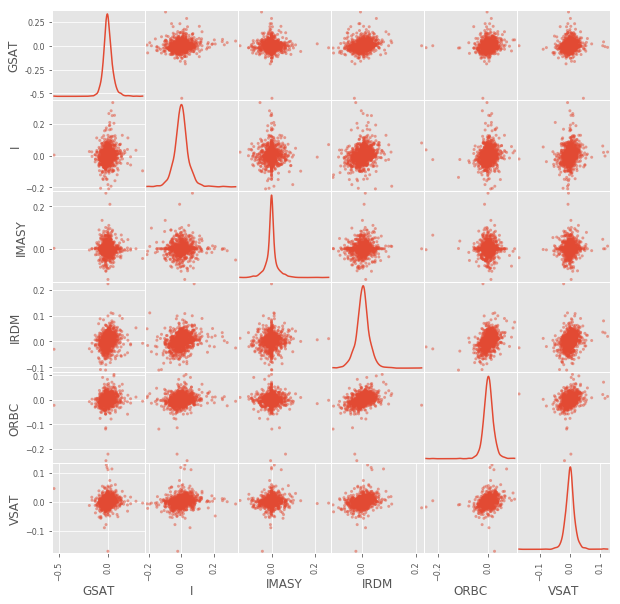

In [0]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

## **Heat map of correlation (light color, higher correlation)**

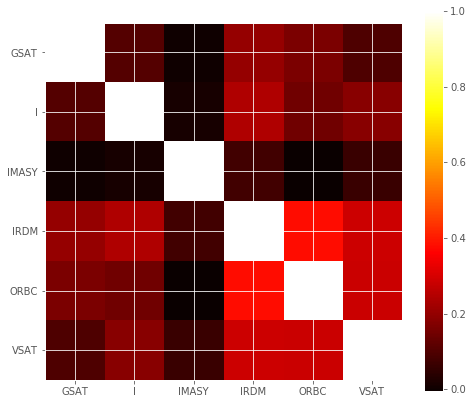

In [0]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## **Stocks Returns Rate and Risk**

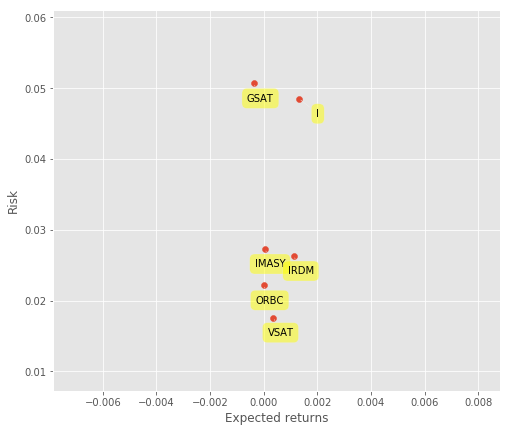

In [0]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

## **Predicting Stocks Price**

In [0]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2015-01-02,9.680000,499700,4.028919,-1.626015
2015-01-05,9.480000,645100,4.324903,-1.659759
2015-01-06,9.180000,510700,5.228753,-3.470031
2015-01-07,9.260000,593200,3.347726,-0.107877
2015-01-08,9.500000,801600,4.421053,0.956431
2015-01-09,9.430000,541400,2.439019,-1.049312
2015-01-12,9.360000,443100,3.205120,-1.161569
2015-01-13,9.320000,749900,5.364807,-1.687762
2015-01-14,9.120000,559100,2.412273,-0.653599


## **Cross Validation**

In [0]:
# Separate data for training and testing
split_fraction = 0.8
ind_split = int(split_fraction * len(dfreg))

In [0]:
df_train = df[:ind_split]
print(df_train.shape)
df_test = df[ind_split:]
print(df_test.shape)

(943, 6)
(236, 6)


In [0]:
window = 20

train_data = df_train['Adj Close']
test_data = df_test['Adj Close']
index = len(df_train) - window

In [0]:
index

923

In [0]:
# Plotting Train and Test data

def plot_train_val(train_data, val_data):
    fig = plt.figure(figsize=[10,10])
    ax = plt.subplot(111)
    ax.plot(df_train, label='Train')
    ax.plot(df_test, label='Valid')
    ax.legend()
    plt.show()

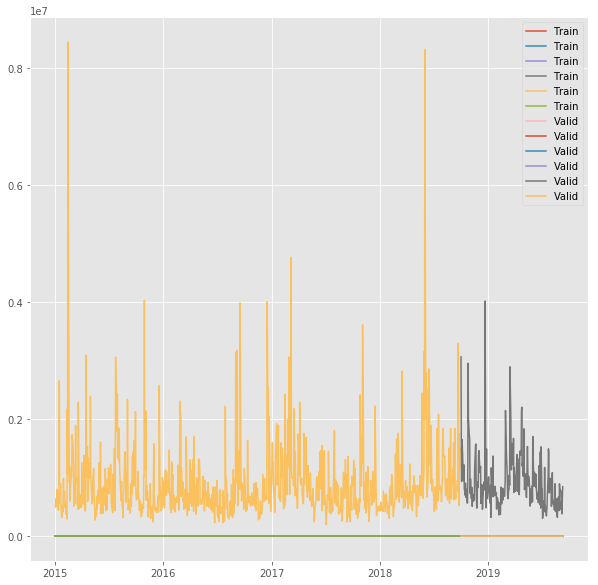

In [0]:
plot_train_val(df_train['Adj Close'], df_test['Adj Close'])

## **Model Generation**

In [0]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]

In [0]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,9.680000,9.480000,9.180000,9.260000,9.500000,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000
1,9.480000,9.180000,9.260000,9.500000,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000
2,9.180000,9.260000,9.500000,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000
3,9.260000,9.500000,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000
4,9.500000,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000
5,9.430000,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000,8.670000
6,9.360000,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000,8.670000,8.570000
7,9.320000,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000,8.670000,8.570000,8.600000
8,9.120000,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000,8.670000,8.570000,8.600000,9.200000
9,8.630000,8.840000,9.110000,9.110000,9.330000,9.290000,9.410000,9.090000,8.960000,8.850000,8.510000,8.510000,8.790000,8.750000,8.710000,8.670000,8.570000,8.600000,9.200000,9.350000


In [0]:
y_train = data.iloc[:,-1]
y_train.shape

(923,)

In [0]:
x_train = data.iloc[:,:-1]
x_train.shape

(923, 19)

In [0]:
index = len(test_data) - window

In [0]:
data = pd.DataFrame(np.zeros((index, window)))

for row in range(index):
  for col in range(window):
    data.iloc[row,col] = train_data[col+row]

In [0]:
y_test = data.iloc[:,-1]
y_test.shape

(216,)

In [0]:
X_test = data.iloc[:,:-1]
X_test.shape

(216, 19)

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt


In [0]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = sqrt(mean_squared_error(y_test, y_pred_lr))            

print('Mean Squared Error:', mse)  
print('Mean Absolute error:', mae)  
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.04756058022367045
Mean Absolute error: 0.14964218225756099
Root Mean Squared Error: 0.21808388345696353


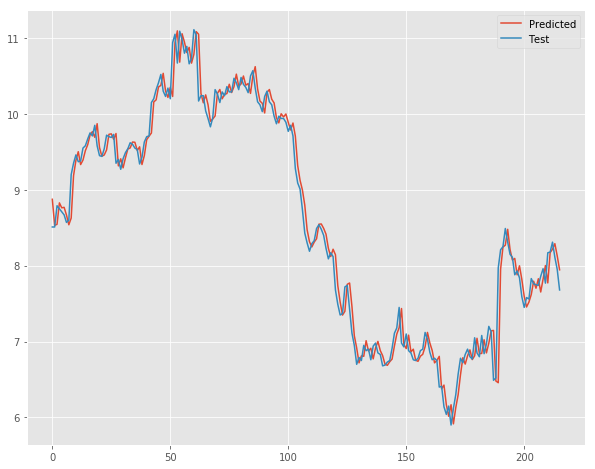

In [0]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lr, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

## Ridge Regression

In [0]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge=ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = sqrt(mean_squared_error(y_test, y_pred_ridge))

print('Mean Squared Error:', mse)  
print('Mean Absolute error:', mae)  
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.04764143727111235
Mean Absolute error: 0.1498703898573077
Root Mean Squared Error: 0.21826918534486803


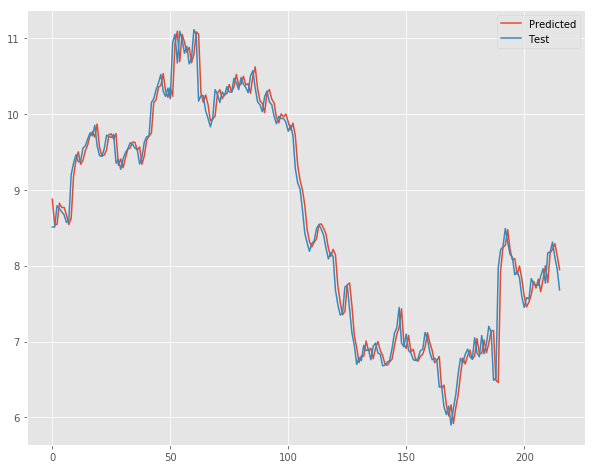

In [0]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_ridge, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

In [0]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)
rmse = sqrt(mean_squared_error(y_test, y_pred_lasso))

print('Mean Squared Error:', mse)  
print('Mean Absolute error:', mae)  
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.09727590214724105
Mean Absolute error: 0.2458545793127251
Root Mean Squared Error: 0.31189084973310943


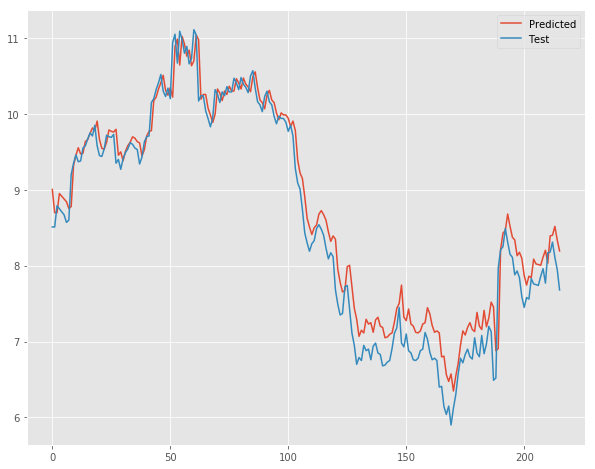

In [0]:
fig = plt.figure(figsize=[10,8])
ax = plt.subplot(111)
ax.plot(y_test.index, y_pred_lasso, label='Predicted')
ax.plot(y_test, label='Test')
ax.legend()
plt.show()

## Comparing models

In [0]:
df_comp=pd.DataFrame({"lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge), "lasso":np.absolute(y_test-y_pred_lasso)
                     })          

(10, 15)

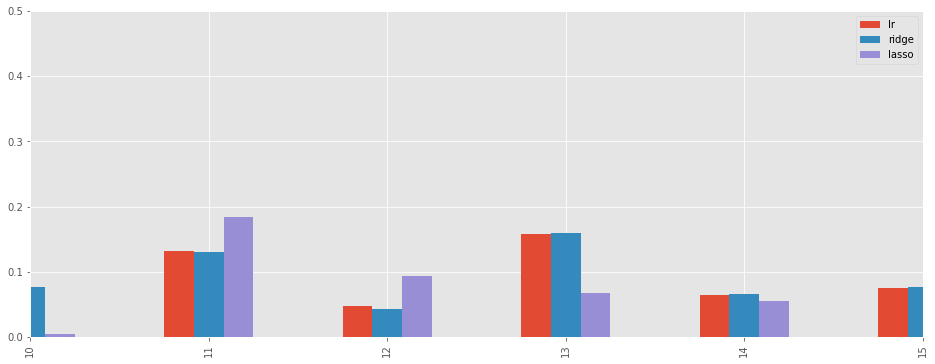

In [0]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,0.5)
plt.xlim(10,15)